# Use different ML methods to classify the iris dataset

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import sympy as sp

# Loading and preparing the data

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

print(dataset.head)

<bound method NDFrame.head of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [3]:
# Statistical Summary   
print(dataset.describe())

# class distribution
print('-'*10)
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
----------
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


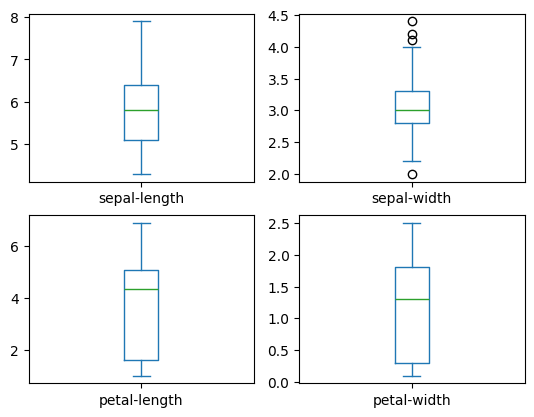

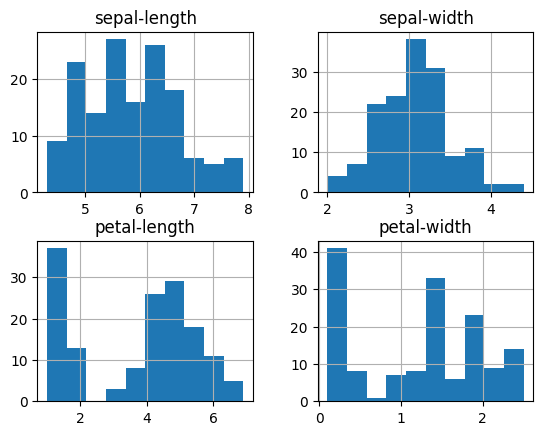

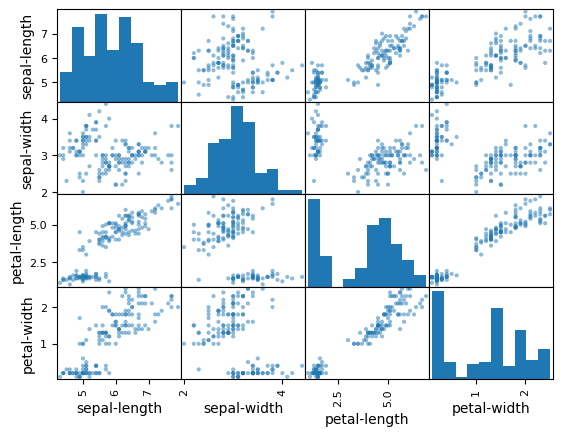

In [4]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

dataset.hist()
plt.show()

scatter_matrix(dataset)
plt.show()

# Creating the model and evaluating the best one

In [5]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4] # Features
y = array[:,4] # Class
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Spot Check Algorithms
models = []
models.append(('LR', OneVsRestClassifier(LogisticRegression(solver='liblinear'))))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f ± %f' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 ± 0.065085
LDA: 0.975000 ± 0.038188
KNN: 0.958333 ± 0.041667
CART: 0.958333 ± 0.041667
NB: 0.950000 ± 0.055277
SVM: 0.983333 ± 0.033333


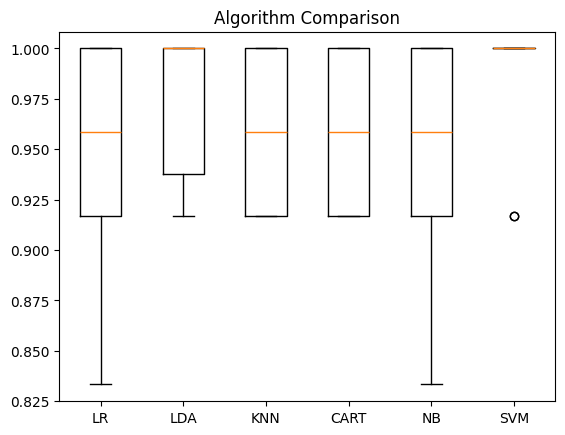

In [6]:
# Compare Algorithms
plt.boxplot(results, tick_labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Predict with the model

In [7]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("Accuracy score:" + str(accuracy_score(Y_validation, predictions)))
print("-"*10)
print("Confusion matrix:")
print(confusion_matrix(Y_validation, predictions))
print("-"*10)
print("Classification report:")

print(classification_report(Y_validation, predictions))

Accuracy score:0.9666666666666667
----------
Confusion matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
----------
Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



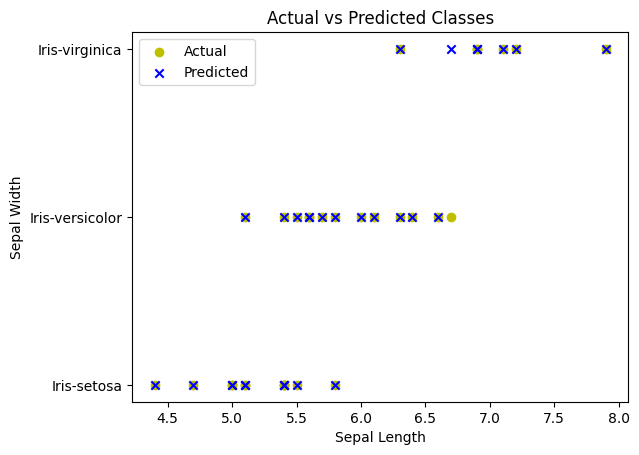

In [12]:
# Plot the actual data
plt.figure()
plt.scatter(X_validation[:, 0], Y_validation, c='y', marker='o', label='Actual')

# Plot the predicted data
plt.scatter(X_validation[:, 0], predictions, c='b', marker='x', label='Predicted')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Actual vs Predicted Classes')
plt.show()